In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import *

from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
sim = AerSimulator()

from util import zero, one, demonstrate_measure

# Foundations: Bloch Spheres: Visualization for Single Qubit

In this notebook, we'll continue our exploration of a single qubit system by introducing the **Bloch sphere**, a visual representation of a single qubit.

References
1. [Introduction to Classical and Quantum Computing: Chapter 2](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## Bloch Sphere

1. A **Bloch sphere** enables us to visualize the quantum state of a single qubit.
2. This visualization will enable us to introduce operations on single qubits geometrically as transformations on the Bloch sphere.

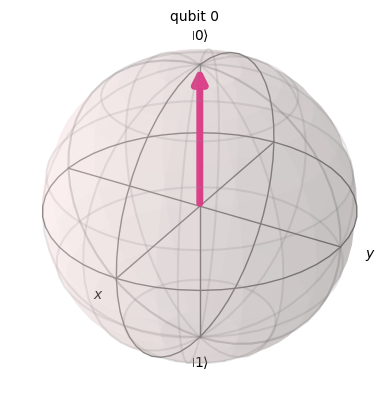

In [2]:
plot_bloch_multivector(zero)

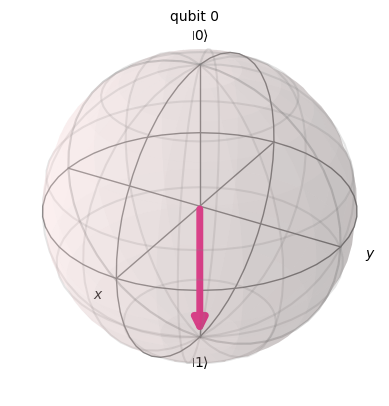

In [3]:
plot_bloch_multivector(one)

### Visualizing Superposition

Every point on the surface of the Bloch sphere encodes a valid quantum state for a single qubit system. This graphically shows that there are an infinite number of quantum states that can be represented by a single qubit. Any qubit that is not at the north or south pole of the Bloch sphere is then in superposition.

In [4]:
q1 = 1/np.sqrt(2)*zero + 1/np.sqrt(2)*one 
q1.draw('latex')

<IPython.core.display.Latex object>

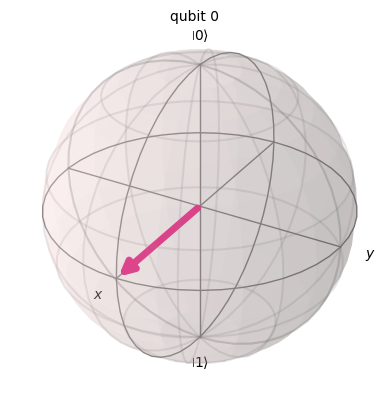

In [5]:
plot_bloch_multivector(q1)

#### Note

1. A state in superposition is a single quantum state.
2. It happens to be a "mixture" of the $|0\rangle$ and $|1\rangle$ state.

In [6]:
q2 = np.sqrt(1/3)*zero + np.sqrt(2/3)*one
Statevector(q2).draw('latex')

<IPython.core.display.Latex object>

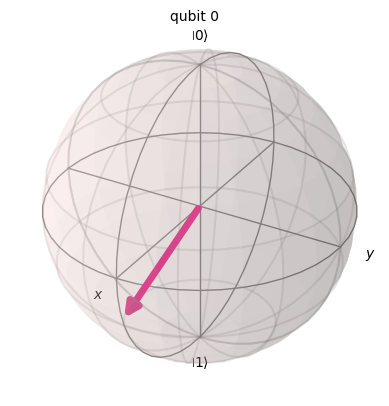

In [7]:
plot_bloch_multivector(q2)

In [8]:
q3 = np.sqrt(-1/3*1j)*zero + np.sqrt(2/3*1j)*one
Statevector(q3).draw('latex')

<IPython.core.display.Latex object>

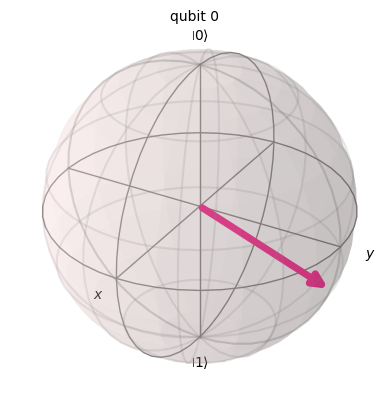

In [9]:
plot_bloch_multivector(q3)

## Translating to a Bloch Sphere

Every qubit $|q\rangle \in Q(1)$ can be written as

$$
|q\rangle = \cos \frac{\theta}{2} |0\rangle + e^{i\phi}\sin \frac{\theta}{2} |1\rangle
$$

where
1. $0 \leq \theta \leq \pi$ is the **polar angle** ($\theta = 0$ means $|0\rangle$ is north and $\theta = \pi$ means $|1\rangle$ is south) and
2. $0 \leq \phi \leq 2\pi$ is the **azimuthal angle**.

### Aside 1: Euler's Formula

The complex exponential $e^{i\phi}$ is defined as

$$
e^{i\phi} = cos \phi + i sin \phi \,.
$$

This is known as **Euler's formula**.

In [10]:
np.exp(np.deg2rad(30)*1j)

np.complex128(0.8660254037844387+0.49999999999999994j)

In [11]:
np.cos(np.deg2rad(30)) + np.sin(np.deg2rad(30))*1j

np.complex128(0.8660254037844387+0.49999999999999994j)

#### Graphical interpretation of Euler's formula

1. As a reminder, every operation on complex numbers can be visualized on the complex plane.
2. Euler's formula corresponds to the unit circle on the complex plane.

Text(0.5, 1.0, '$e^{i * theta}$')

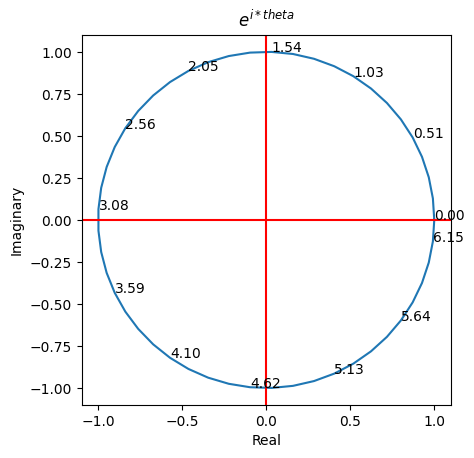

In [12]:
fig = plt.figure(); ax = fig.add_subplot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

# Plot
thetas = np.linspace(0, 2*np.pi)                 # 50 evenly spaces points in [0, 2\pi]
txt = [f"{theta:.2f}" for theta in thetas]
zs = [np.exp(theta * 1j) for theta in thetas]    # e^(j\theta) or e^(i\theta) for theta in [0, 2\pi]
for i, t in enumerate(txt):
    if i % 4 == 0:
        plt.annotate(t, (zs[i].real, zs[i].imag))

# Plot meta-data
plt.plot([z.real for z in zs], [z.imag for z in zs])
plt.axhline(y=0.0, color='r', linestyle='-'); plt.axvline(x=0.0, color='r', linestyle='-')
plt.xlabel('Real'); plt.ylabel('Imaginary'); plt.title('$e^{i * theta}$')

### Example: Translating to a Bloch Sphere

We give an example translation now (Following [1]). For reference, the formula is

$$
|q\rangle = \cos \frac{\theta}{2} |0\rangle + e^{i\phi}\sin \frac{\theta}{2} |1\rangle \,.
$$

In [13]:
q2.draw('latex')

<IPython.core.display.Latex object>

#### Observations

Observe that

1.

$$
\frac{\sqrt{3}}{3} = \cos(\theta/2)
$$

and

2. 
$$
\frac{\sqrt{6}}{3} = e^{i\phi} \sin(\theta/2) \,.
$$

In [14]:
def convert_alpha(alpha: float) -> float:
    return 2*np.rad2deg(np.arccos(alpha))

theta = convert_alpha(np.sqrt(3)/3)
theta

np.float64(109.47122063449069)

In [15]:
# Check conversion of alpha
print("Original coefficient", np.sqrt(3)/3)
print("From calculation", np.cos(np.deg2rad(theta)/2))

Original coefficient 0.5773502691896257
From calculation 0.5773502691896257


In [16]:
# Check conversion of beta which is missing a factor of e^{i\phi}
np.sin(np.deg2rad(theta)/2), np.sqrt(6)/3

(np.float64(0.816496580927726), np.float64(0.8164965809277259))

In [17]:
# Can infer that phi is 0
phi = 0
phi, np.exp(0j)

(0, np.complex128(1+0j))

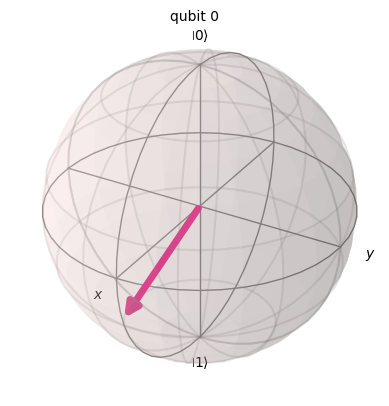

In [18]:
plot_bloch_multivector(q2)

### Aside 2: Global Phase

1. The translation to a Bloch sphere might appear strange.
2. In particular, a pair of complex numbers is specified by 4 numbers subject to a constraint. This means that there are effectively only 3 numbers used to specify a point on the Bloch sphere.
3. However, the specification of a Bloch sphere only has 2 numbers!
4. The missing degree of freedom is called the **global phase**. The global phase is physically irrelevant.

In [19]:
q3.draw('latex')

<IPython.core.display.Latex object>

#### Factor out global phase

In [20]:
def to_polar(z: np.complex128) -> Tuple[float, float]:
    r = np.linalg.norm(z)
    theta = np.rad2deg(np.arccos((z.real/r)))
    return r, theta

r0, theta0 = to_polar(q3[0])
print("r0", r0, "theta0", theta0)
r1, theta1 = to_polar(q3[1])
print("r1", r1, "theta1", theta1)

r0 0.5773502691896257 theta0 45.0
r1 0.816496580927726 theta1 45.00000000000001


\begin{align}
(\frac{\sqrt{6}}{6} - \frac{\sqrt{6}}{6}i) |0\rangle + (\frac{\sqrt{3}}{3} - \frac{\sqrt{3}}{3}i) |1\rangle & = e^{45\pi/180 i}\frac{\sqrt{3}}{3}|0\rangle + e^{45\pi/180 i}\frac{\sqrt{6}}{3}|1\rangle \tag{to polar} \\
& = e^{45\pi/180 i} (\frac{\sqrt{3}}{3}|0\rangle + \frac{\sqrt{6}}{3}|1\rangle) \tag{factor}
\end{align}

1. The **global phase** is $45^\circ$.
2. The **relative phase** is $0^\circ$.

#### Global phase is indistinguishable by measurement

1. We have just seen that $|q_2\rangle$ and $|q_3\rangle$ are the same up to global phase.
2. This means that these two quantum states are indistinguishable by measurement.
3. We can see this since rotation by $\phi$ on the Bloch sphere preserves the distance of the qubit encoding from $|0\rangle$ to $|1\rangle$ so that the probability of measurement is also preserved.

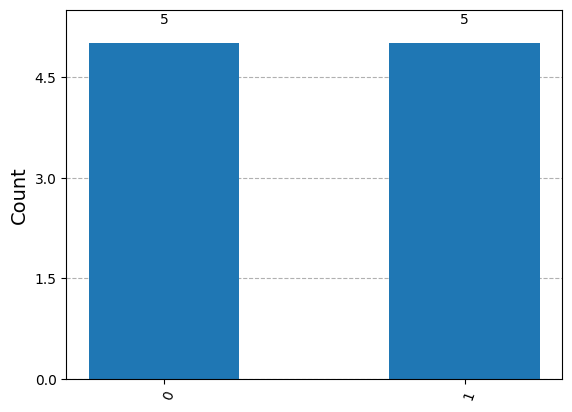

In [21]:
demonstrate_measure(q2)

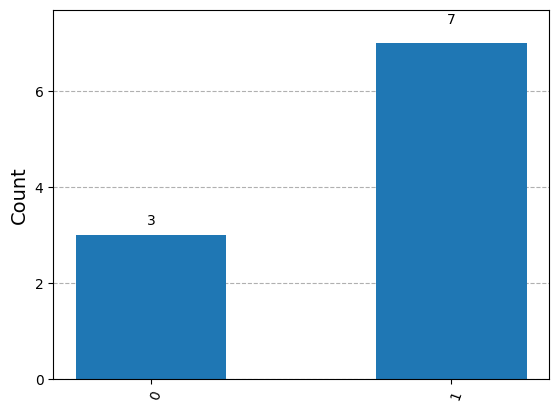

In [22]:
demonstrate_measure(q3)

## Summary

1. A Bloch sphere encodes the quantum state of a qubit up to global phase.
2. The global phase is indistinguishable by measurement.
3. The relative phase is given by $\phi$ and is distinguishable.